In [14]:
# documentação: https://www.w3schools.com/python/python_mysql_getstarted.asp
import mysql.connector
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white")
%matplotlib inline

In [15]:
mysql = mysql.connector.connect(
    host     = "localhost",
    user     = "root",
    passwd   = ""
)

mysqlcursor = mysql.cursor()

In [3]:
mysqlcursor.execute("CREATE DATABASE IF NOT EXISTS database_nosql_teste")

In [16]:
mysqlcursor.execute("Use database_nosql_teste")

In [5]:
def createTables():
    tabelasSQL = open("tabelas_mysql.sql", "r")
    criarTabelas = tabelasSQL.read().split(";")
    criarTabelas = [str(el).replace("\n", "") for el in criarTabelas]
    for i in criarTabelas:
        mysqlcursor.execute(i)
        
createTables()

In [6]:
def deleteTables():
    mysqlcursor.execute("DROP TABLE curso")
    mysqlcursor.execute("DROP TABLE bolsas")
    mysqlcursor.execute("DROP TABLE cidade")
    mysqlcursor.execute("DROP TABLE notas")
    mysqlcursor.execute("DROP TABLE universidade")

In [7]:
def getTuple(linhas):
    valores = []
    for i in linhas:
        i = i.replace("\n", "")
        i = map(str, i.split(","))
        valores.append(tuple([el.replace("\"", "") for el in i]))
    return valores

In [8]:
insertUni = "INSERT INTO universidade "
insertUni += "(`campus_external_id`, `universidade_nome`, `campus_nome`, `nome`) "
insertUni += "VALUES (%s, %s, %s, %s)"

insertNotas = "INSERT INTO notas "
insertNotas += "(`nota_integral_ampla`, `nota_integral_cotas`, `nota_parcial_ampla`, `nota_parcial_cotas`) "
insertNotas += "VALUES (%s, %s, %s, %s)"

insertCidade = "INSERT INTO cidade "
insertCidade += "(`cidade_busca`, `uf_busca`, `cidade_filtro`) "
insertCidade += "VALUES (%s, %s, %s)"

insertBolsa = "INSERT INTO bolsas "
insertBolsa += "(`bolsa_integral_cotas`, `bolsa_integral_ampla`, `bolsa_parcial_cotas`, `bolsa_parcial_ampla`) "
insertBolsa += "VALUES (%s, %s, %s, %s)"

insertCurso = "INSERT INTO curso "
insertCurso += "(`curso_id`, `curso_busca`, `grau`, `turno`, `mensalidade`, `cidade_id`, `universidade_id`, `notas_id`, `bolsas_id`) "
insertCurso += "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"

In [9]:
valuesUniversidade = getTuple(open("insertsUniversidades.sql", "r").readlines())
valuesBolsa = getTuple(open("insertsBolsas.sql", "r").readlines())
valuesCidade = getTuple(open("insertsCidades.sql", "r").readlines())
valuesNota = getTuple(open("insertsNotas.sql", "r").readlines())
valuesCurso = getTuple(open("insertsCurso.sql", "r").readlines())

In [10]:
inicio = time.time()
for j in valuesUniversidade:
    mysqlcursor.execute(insertUni, j)
mysql.commit()
for j in valuesBolsa:
    mysqlcursor.execute(insertBolsa, j)
mysql.commit()
for j in valuesNota:
    mysqlcursor.execute(insertNotas, j)
mysql.commit()
for j in valuesCidade:
    mysqlcursor.execute(insertCidade, j)
mysql.commit()
for j in valuesCurso:
    mysqlcursor.execute(insertCurso, j)
mysql.commit()
fim = time.time()
tempoInsert = fim-inicio
print(f"tempo gasto para inserir todos os elementos: {tempoInsert} s")

tempo gasto para inserir todos os elementos: 39.306227922439575 s


In [11]:
query = """
select * 
from curso c
inner join notas n
on c.notas_id = n.id
inner join bolsas b
on c.bolsas_id = b.id
inner join universidade u
on universidade_id = u.campus_external_id
inner join cidade ci
on c.cidade_id = ci.cidade_busca
"""
inicio = time.time()
mysqlcursor.execute(query)
fim = time.time()
tempoSelect = fim-inicio
print(f"tempo gasto para buscar todos os elementos: {tempoSelect} s")

tempo gasto para buscar todos os elementos: 0.009923696517944336 s


In [12]:
updateUni = "UPDATE universidade SET nome = concat('curso: ',  nome)"
updateBolsa = "UPDATE bolsas SET bolsa_integral_cotas=bolsa_integral_cotas+5, bolsa_parcial_cotas=bolsa_parcial_cotas+10"
updateNotas = "UPDATE notas SET nota_integral_ampla=nota_integral_ampla*1.05, nota_parcial_ampla=nota_parcial_ampla*0.95"
updateCidade = "UPDATE cidade SET cidade_busca = concat(cidade_busca, uf_busca)"
updateCurso = "UPDATE curso SET mensalidade=mensalidade*1.05"

In [17]:
inicio = time.time()
mysqlcursor.execute(updateBolsa)
mysql.commit()
mysqlcursor.execute(updateCidade)
mysql.commit()
mysqlcursor.execute(updateUni)
mysql.commit()
mysqlcursor.execute(updateNotas)
mysql.commit()
mysqlcursor.execute(updateCurso)
mysql.commit()
fim = time.time()
tempoUpdate = fim-inicio
print(f"tempo gasto para buscar apagar os elementos das tabelas: {tempoUpdate} s")

tempo gasto para buscar apagar os elementos das tabelas: 4.306722402572632 s


In [18]:
deleteUni = "DELETE FROM universidade"
deleteBolsa = "DELETE FROM bolsas"
deleteCidade = "DELETE FROM cidade"
deleteNotas = "DELETE FROM notas"
deleteCurso = "DELETE FROM curso"

In [19]:
inicio = time.time()
mysqlcursor.execute(deleteBolsa)
mysql.commit()
mysqlcursor.execute(deleteCidade)
mysql.commit()
mysqlcursor.execute(deleteUni)
mysql.commit()
mysqlcursor.execute(deleteNotas)
mysql.commit()
mysqlcursor.execute(deleteCurso)
mysql.commit()
fim = time.time()
tempoDelete = fim-inicio
print(f"tempo gasto para buscar apagar os elementos das tabelas: {tempoDelete} s")

tempo gasto para buscar apagar os elementos das tabelas: 3.0610716342926025 s


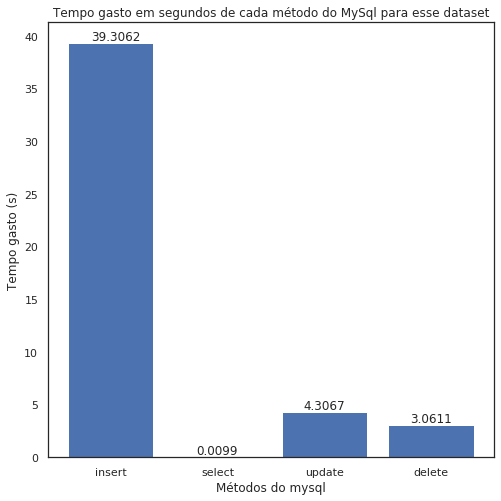

In [20]:
x = ['insert', 'select', 'update', 'delete']
y = [tempoInsert, tempoSelect, tempoUpdate, tempoDelete]
p = plt.figure(figsize=(8, 8))
plt.bar(x, y, label = 'Barras')
plt.xlabel('Métodos do mysql')
plt.ylabel('Tempo gasto (s)')
plt.title('Tempo gasto em segundos de cada método do MySql para esse dataset')

eixoY = [tempoInsert, tempoUpdate, tempoSelect, tempoDelete]
eixoX = [0.32, 2.3, 1.3, 3.3]
for i in range(len(eixoX)):
    plt.text(x = eixoX[i]-0.5 , y = eixoY[i]+0.3, s = round(eixoY[i], 4), size = 12)

plt.show()

In [21]:
p.savefig('graficoTempoMysql.png', format='png')

In [22]:
deleteTables()

In [23]:
mysqlcursor.execute("DROP DATABASE database_nosql_teste")